In [60]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn import decomposition
from sklearn import cross_validation
import time # computation time benchmark
from sklearn import neighbors
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.decomposition import  KernelPCA
from sklearn.utils import shuffle
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.cross_validation import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit
import time

In [61]:
m_data = fetch_mldata("MNIST original")

In [62]:
print(m_data.data.shape) #(70000, 784)

(70000, 784)


In [63]:
#Normalization 
x = np.float32(m_data.data[:70000])/255.

In [64]:
y = np.float32(m_data.target[:70000])

In [65]:
x_n, y_n = shuffle(x,y)

In [66]:
x_n.shape

(70000, 784)

In [67]:
y_n.shape

(70000,)

In [68]:
tr1_x, ts1_x, tr1_y, ts1_y = train_test_split(x_n, y_n, test_size = 0.2, random_state = 42)

In [69]:
print('train feature', tr1_x.shape)
print('test feature', ts1_x.shape)
print('train prediction', tr1_y.shape)
print('test prediction', ts1_y.shape)

train feature (56000, 784)
test feature (14000, 784)
train prediction (56000,)
test prediction (14000,)


In [70]:
tr_x = tr1_x[:46000]
tr_y = tr1_y[:46000]
val_x = tr1_x[46000:]
val_y = tr1_y[46000:]

In [71]:
print('train feature', tr_x.shape)
print('train label size', tr_y.shape)
print('val test feature size', val_x.shape)
print('val test label size', val_y.shape)

train feature (46000, 784)
train label size (46000,)
val test feature size (10000, 784)
val test label size (10000,)


# Dimensionality Reduction PCA and LDA

In [72]:
pca = PCA(n_components=700)
x_pca = pca.fit_transform(tr_x, tr_y)
x_pca_val = pca.transform(val_x)
x_pca_ts = pca.transform(ts1_x)
print('Variance covered', pca.explained_variance_ratio_.sum())
print('train PCA Shape', x_pca.shape)
print('Val PCA Shape', x_pca_val.shape)
print('Test PCA Shape', x_pca_ts.shape)

Variance covered 1.0
train PCA Shape (46000, 700)
Val PCA Shape (10000, 700)
Test PCA Shape (14000, 700)


In [73]:
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(x_pca, tr_y)
x_lda_val = lda.transform(x_pca_val)
x_lda_ts = lda.transform(x_pca_ts)
print('Variance covered', lda.explained_variance_ratio_.sum())
print('PCA Shape', x_lda.shape)
print('val PCA Shape', x_lda_val.shape)
print('Test PCA Shape', x_lda_ts.shape)

Variance covered 1.0
PCA Shape (46000, 9)
val PCA Shape (10000, 9)
Test PCA Shape (14000, 9)


# Cross-validation:  Experimenting with k-value

In [74]:
start = int(round(time.time() * 1000))

In [75]:
k = np.arange(5,100,10)

In [76]:
acc = []
for i in k:
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_lda, tr_y)
    cv1 = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    scores = cross_validation.cross_val_score(knn, x_lda, tr_y, cv=5)
    print('cross validation with k value', i)
    print ('Cross validation', scores)
    acc.append(scores.mean())
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

cross validation with k value 5
Cross validation [ 0.92189028  0.92111268  0.91836957  0.91887777  0.91833406]
Accuracy: 0.9197 (+/- 0.0030)
cross validation with k value 15
Cross validation [ 0.91939163  0.9207867   0.91434783  0.9184428   0.91811657]
Accuracy: 0.9182 (+/- 0.0043)
cross validation with k value 25
Cross validation [ 0.91754481  0.91828751  0.91413043  0.91528926  0.91474554]
Accuracy: 0.9160 (+/- 0.0032)
cross validation with k value 35
Cross validation [ 0.91374253  0.91665761  0.91293478  0.9131144   0.91170074]
Accuracy: 0.9136 (+/- 0.0033)
cross validation with k value 45
Cross validation [ 0.91146116  0.91535369  0.90923913  0.9131144   0.90985211]
Accuracy: 0.9118 (+/- 0.0045)
cross validation with k value 55
Cross validation [ 0.90983161  0.91350647  0.90717391  0.91180948  0.90876468]
Accuracy: 0.9102 (+/- 0.0045)
cross validation with k value 65
Cross validation [ 0.90983161  0.91220254  0.90684783  0.91039582  0.90800348]
Accuracy: 0.9095 (+/- 0.0037)
cross v

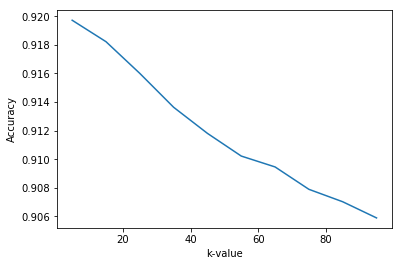

In [84]:
plt.plot(k,acc)
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.show()

In [79]:
end = int(round(time.time() * 1000))
print("--NN fitting finished in ", (end-start), "ms--------------")

--NN fitting finished in  114325 ms--------------


# Validation set score

In [80]:
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
knn.fit(x_lda, tr_y)
pred = knn.predict(x_lda_val)
score = metrics.accuracy_score(val_y, pred)
print ('Test Accuracy', score)
Recall = metrics.recall_score(val_y, pred, average='weighted')
print('Test Recall', Recall)
Precision = metrics.precision_score(val_y, pred, average='weighted')
print('Test Precision', Precision)
F1 = metrics.f1_score(val_y, pred, average='weighted')
print('F1', F1)
matrix = metrics.confusion_matrix(val_y, pred)
print('Confusion Matrix', matrix)

Test Accuracy 0.9132
Test Recall 0.9132
Test Precision 0.91291228156
F1 0.912839362244
Confusion Matrix [[ 945    0    5    5    0    7    8    2    4    1]
 [   0 1056    9    0    1    2    1    5    6    0]
 [  10   12  942   18    5    2   21    4   20    2]
 [   1    6   18  884    3   39    2   17   21   10]
 [   0    3    7    1  939    2    6    1    5   39]
 [  10    7   10   41    5  741   18    6   28    8]
 [   9    2    7    1   16   21  980    0    3    0]
 [   6    8    8    4   14    1    0  963    1   38]
 [   5   43    8   23   12   41    8    2  784   17]
 [   2    1    9    8   45    3    0   28   10  898]]


# TESTING

In [81]:
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
knn.fit(x_lda, tr_y)
pred = knn.predict(x_lda_ts)

In [82]:
score = metrics.accuracy_score(ts1_y, pred)
print ('Test Accuracy', score)
Recall = metrics.recall_score(ts1_y, pred, average='weighted')
print('Test Recall', Recall)
Precision = metrics.precision_score(ts1_y, pred, average='weighted')
print('Test Precision', Precision)
F1 = metrics.f1_score(ts1_y, pred, average='weighted')
print('F1', F1)
matrix = metrics.confusion_matrix(ts1_y, pred)
print('Confusion Matrix', matrix)

Test Accuracy 0.915357142857
Test Recall 0.915357142857
Test Precision 0.915001678022
F1 0.915026874267
Confusion Matrix [[1324    0    6    1    3   14    8    2    8    2]
 [   3 1548   16    1    2    0    1    5   10    3]
 [  17   15 1260   27   19    7   14    8   25    5]
 [   4    5   37 1229    1   60    3   23   33   19]
 [   5    5   10    1 1223    2    7    1   11   53]
 [  13    6    6   51    8 1071   24   10   50   15]
 [  10    2    9    0   11   15 1304    0    3    1]
 [   3   26   19    8   18    4    0 1375    4   35]
 [  12   45   13   33   12   43   13    5 1174   20]
 [   7    2    2   14   57    6    1   39    8 1307]]


In [83]:
print("Classification report for KNN-LDA-PCA classifier %s:\n%s\n"
     % (knn, metrics.classification_report(ts1_y, pred)))

Classification report for KNN-LDA-PCA classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

        0.0       0.95      0.97      0.96      1368
        1.0       0.94      0.97      0.95      1589
        2.0       0.91      0.90      0.91      1397
        3.0       0.90      0.87      0.88      1414
        4.0       0.90      0.93      0.92      1318
        5.0       0.88      0.85      0.87      1254
        6.0       0.95      0.96      0.96      1355
        7.0       0.94      0.92      0.93      1492
        8.0       0.89      0.86      0.87      1370
        9.0       0.90      0.91      0.90      1443

avg / total       0.92      0.92      0.92     14000


